In [19]:
import SMF_BCD as SMF
import numpy as np
from plotting import *

In [22]:
X = np.loadtxt("Output/A_new.txt")
Y = np.loadtxt("Output/y_new.txt")[:, np.newaxis]
Xtest = np.loadtxt("Output/At_new.txt")
Ytest = np.loadtxt("Output/yt_new.txt")[:, np.newaxis]
# Ytest = Ytest.reshape(1,200)
# results_dict_list = []

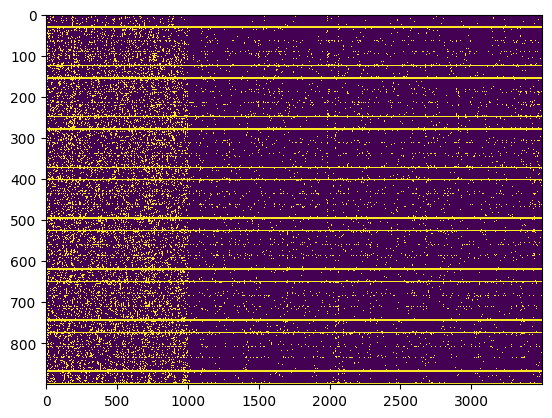

In [23]:
plt.imshow(X, interpolation='nearest', aspect='auto')

In [24]:
SMF_Train = SMF.SDL_BCD([X, Y.T], X_test=[Xtest, Ytest.T], xi=5, n_components=16)

initial loading beta [[-0.86876095  0.01405757 -0.08177838  0.52357915 -0.34148648  0.051842
  -0.68043735  0.55685188  0.01944467  0.62610671 -0.20800003 -0.31517406
  -0.41808709 -0.45039601  0.69277859 -0.32204437 -0.75104329]]


In [30]:
results_dict_new = SMF_Train.fit(iter=250, subsample_size=None, option = "filter",# search_radius_const=200*np.linalg.norm(X),
                                if_compute_recons_error=True, if_validate=True)

  1%|          | 2/250 [00:00<00:43,  5.67it/s]

--- Training --- [threshold, AUC] =  [0.745, 0.999]
--- Iteration 0: Training loss --- [Data, Label, Total] = [185399.294762.3, 119.826559.3, 927116.300367.3]


  4%|▍         | 10/250 [00:01<00:29,  8.10it/s]

--- Training --- [threshold, AUC] =  [0.615, 0.999]
--- Iteration 10: Training loss --- [Data, Label, Total] = [168296.045036.3, 97.815321.3, 841578.040499.3]
!!! pred_type filter


  4%|▍         | 10/250 [00:02<01:05,  3.68it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [0.615, 0.999, 0.992, 0.995]
!!! --- Validation (Stopped) --- [threshold, ACC] =  [0.615, 0.992]
!!! pred_type filter


In [31]:
W = results_dict_new.get('loading')[0]
print(f"Shape of dictionaries: {W.shape}")
beta = results_dict_new.get('loading')[1]
print(f"Shape of regression coefficients: {beta.shape}")

Shape of dictionaries: (900, 16)
Shape of regression coefficients: (1, 17)


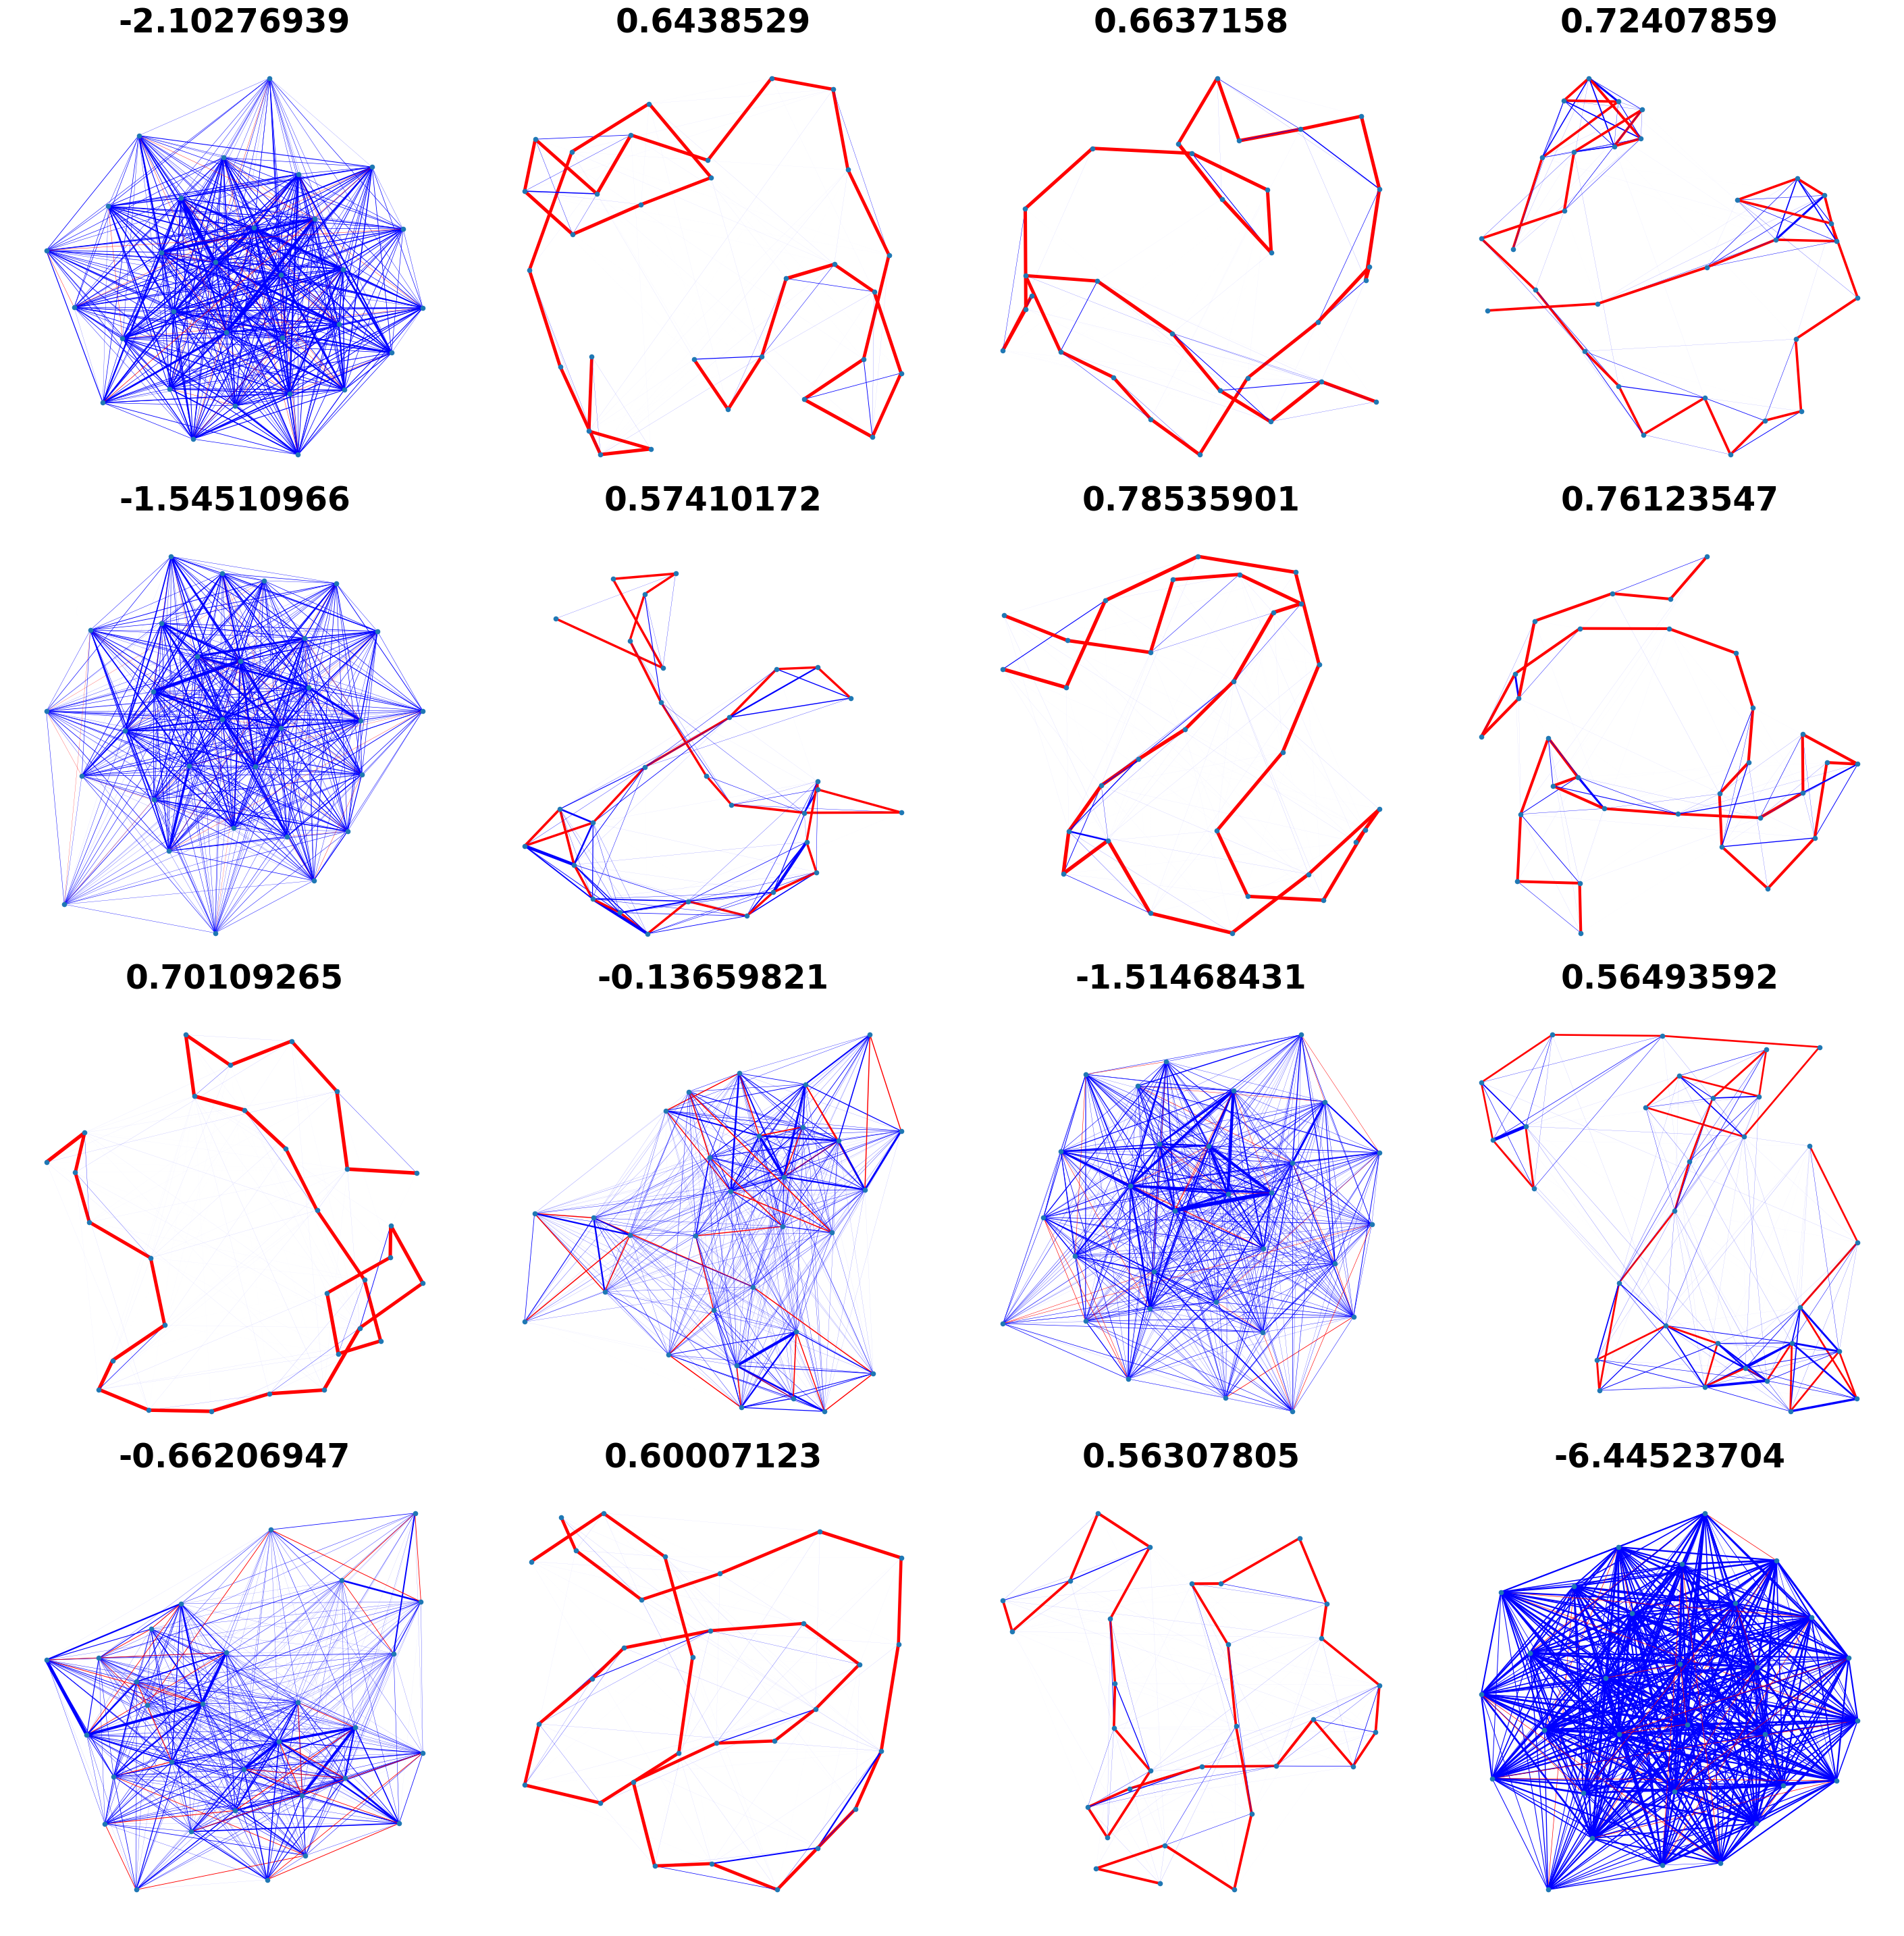

In [32]:
## Visualize dictionaries
display_dict_and_graph(save_path='Output/Test_Dictionaries', W=W, regression_coeff=beta.T, fig_size=[35,35], plot_graph_only=True)

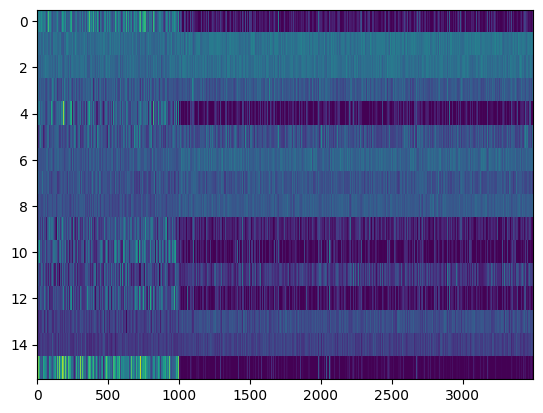

In [34]:
plt.imshow(results_dict_new.get('code'), interpolation='nearest', aspect='auto')

In [33]:
beta

array([[ 0.59334901, -2.10276939,  0.6438529 ,  0.6637158 ,  0.72407859,
        -1.54510966,  0.57410172,  0.78535901,  0.76123547,  0.70109265,
        -0.13659821, -1.51468431,  0.56493592, -0.66206947,  0.60007123,
         0.56307805, -6.44523704]])

In [41]:
np.sum(X[:,:1000])

197070.0

In [42]:
np.sum(X[:,1001:])

210702.0